In [2]:
import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [3]:
data = load_iris()
inp, y = data['data'], data['target']
X = inp[y<2]
y = y[y<2]
print('Shape of input: {}'.format(X.shape))

Shape of input: (100, 4)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20)
print(X_train.shape, X_test.shape)

(80, 4) (20, 4)


In [5]:
import optim
import model

In [15]:
def predict(model, X, y):
    y_pred = model.predict(X)
    zeros = y_pred[y == 0]
    ones = y_pred[y == 1]
    y_pred[y_pred>0] = 1
    y_pred[y_pred<=0] = 0
    
    return y_pred, 1/(1+np.exp(-zeros)), 1/(1+np.exp(-ones))
    
def visualize_result(model, X, y):
    y_pred, zeros, ones = predict(model, X, y)
    print('Accuracy score: {}'.format(np.round(accuracy_score(y_pred, y), 3)))

    plt.figure(figsize=(10, 5))
    plt.plot(zeros, 'o', label='Negative')
    plt.plot(ones, 'o', label='Positive')
    plt.title('Distribution of outputs by classes')
    plt.xlabel('Number of example')
    plt.ylabel('Model output')
    plt.legend()
    plt.grid()
    plt.show()

**Classic Gradient**

Logistic Regressor
	Number of input: 4
	Bias:		 True

Time spent: 0.004996538162231445
Accuracy score: 0.95


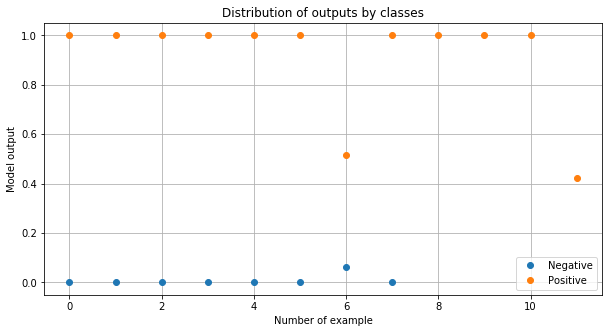

In [73]:
clf = model.LogisticRegressor(input_size=X_train.shape[1], bias=True)
classic = optim.GradientDescent(clf.W, lr=1, weight_decay=0.1)
print(clf)
start = time.time()
clf.fit(X=X_train, y=y_train, optimizer=classic, epoch=10, verbose=0)
print('Time spent: {}'.format(time.time()-start))
visualize_result(clf, X_test, y_test)

**SGD**

In [9]:
clf = model.LogisticRegressor(input_size=X_train.shape[1], bias=True)
classic = optim.SGD(clf.W, lr=5, weight_decay=0)
print(clf)
start = time.time()
clf.fit(X=X_train, y=y_train, optimizer=classic, epoch=1, verbose=0)
print('Time spent: {}'.format(time.time()-start))
visualize_result(clf, X_test, y_test)

Logistic Regressor
	Number of input: 4
	Bias:		 True

Time spent: 0.028496980667114258


C:\Users\fgrim\Desktop\Optimization\optimization\optim.py:91: RuntimeWarning: invalid value encountered in true_divide
  self.prm = self.prm - self.lr*gradient/np.linalg.norm(gradient)
C:\Users\fgrim\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\fgrim\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\fgrim\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """
C:\Users\fgrim\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in less_equal
  


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').